# Einlesen des Bilds

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [2]:
def show(image, normalize):
    # Helper-method to show an image
    return plt.imshow(image, cmap="gray") if normalize\
        else plt.imshow(image, cmap="gray", norm=NoNorm())

In [3]:
base = np.array([[3, 3, 4, 3, 0, 1, 4, 7, 5, 4],
             [0, 5, 1, 5, 4, 5, 73, 3, 5, 4],
             [4, 2, 5, 5, 1, 5, 6, 3, 5, 2],
             [4, 18, 24, 16, 10, 28, 44, 3, 2, 2],
             [1, 11, 14, 10, 14, 41, 28, 1, 4, 4],
             [6, 12, 21, 10, 18, 29, 26, 3, 4, 2],
             [6, 20, 21, 36, 33, 31, 16, 4, 1, 5],
             [3, 14, 10, 40, 19, 24, 6, 4, 2, 5],
             [4, 9, 6, 28, 30, 22, 13, 6, 6, 2],
             [4, 2, 5, 3, 3, 3, 5, 3, 3, 3]])

# Erste Teilaufgabe
Berechnen Sie das Histogramm, den mittleren Grauwert, den globalen Kontrast und die Entropie des
Bildes.

# Histogramm

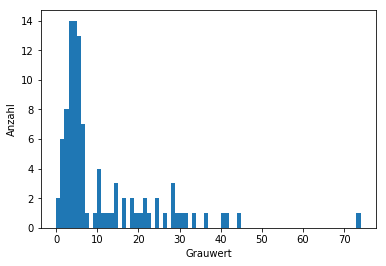

In [4]:
plt.xlabel('Grauwert')
plt.ylabel('Anzahl')
hist = plt.hist(base.flatten(), bins=np.arange(np.max(base) + 2))

Wertetabelle:

In [5]:
print('Grauwert\tAnzahl')
for index, x in np.ndenumerate(hist[0]):
    if x > 0:
        print(hist[1][index],'\t\t', x)

Grauwert	Anzahl
0 		 2.0
1 		 6.0
2 		 8.0
3 		 14.0
4 		 14.0
5 		 13.0
6 		 7.0
7 		 1.0
9 		 1.0
10 		 4.0
11 		 1.0
12 		 1.0
13 		 1.0
14 		 3.0
16 		 2.0
18 		 2.0
19 		 1.0
20 		 1.0
21 		 2.0
22 		 1.0
24 		 2.0
26 		 1.0
28 		 3.0
29 		 1.0
30 		 1.0
31 		 1.0
33 		 1.0
36 		 1.0
40 		 1.0
41 		 1.0
44 		 1.0
73 		 1.0


# Entropie
Die Entropie definiert den mittleren Informationsgehalt pro Bildpunkt (Bits pro Bildpunkt)
![formula4.png](formula4.png)
p<sub>k</sub>: relative Häufigkeit eines Grauwerts

In [6]:
entropie = 0
num_pix = base.shape[0] * base.shape[1] #Anzahl Bildpunkte
for index, y in np.ndenumerate(hist[0]): #Iteriere Histogramm
    if y > 0: #nur falls Anzahl des Grauwerts > 0
        p = y / num_pix #relative Haeufigkeit des Grauwerts
        entropie += (-p * np.log2(p)) #addiere Summenelement
entropie     

4.230029303609683

![formula2.png](formula2.png)

In [7]:
avg = 0
#iteriere Grauwerte
for g in np.nditer(base):
    avg += g #addiere summenelement
avg /= num_pix #dividiere durch Anzahl Bildpunkte 
avg

10.47

![formula3.png](formula3.png)

In [8]:
global_contrast = 0
#iteriere ueber Grauwerte
for g in np.nditer(base):
    #addiere summenelement
    global_contrast += (g - avg)**2
#dividiere durch Anzahl Bildpunkte 
global_contrast /= num_pix
global_contrast

146.5491

# Zweite Teilaufgabe
Bestimmen Sie eine Funktion zur linearen Grauwertspreizung für die Abbildung der Werte aus dem
Intervall [9, 41] des Bildes auf eine 6 bit Grauwertdarstellung.

# Grauwertspreizung nach Formel aus den Folien:
![figure1.png](figure1.png)

![formula1.png](formula1.png)

In [15]:
def transform(image, outputMax, windowMin, windowMax):
    #transformiere jeden Grauwert
    return np.piecewise(image,
                 #clipping
                 [image < windowMin, image > windowMax],
                 [0, outputMax,
                      #T-strech
                      lambda x: ((x - windowMin) * outputMax) / 
                      (windowMax - windowMin)])

# Dritte Teilaufgabe
Berechnen Sie ein neues Bild anhand dieser Transformation und visualisieren Sie beide
Grauwertbilder (Ausgangsbild, transformiertes Bild).

# Visualisierung mit Normierung (73 als max Wert = weiß)

In [16]:
base

array([[ 3,  3,  4,  3,  0,  1,  4,  7,  5,  4],
       [ 0,  5,  1,  5,  4,  5, 73,  3,  5,  4],
       [ 4,  2,  5,  5,  1,  5,  6,  3,  5,  2],
       [ 4, 18, 24, 16, 10, 28, 44,  3,  2,  2],
       [ 1, 11, 14, 10, 14, 41, 28,  1,  4,  4],
       [ 6, 12, 21, 10, 18, 29, 26,  3,  4,  2],
       [ 6, 20, 21, 36, 33, 31, 16,  4,  1,  5],
       [ 3, 14, 10, 40, 19, 24,  6,  4,  2,  5],
       [ 4,  9,  6, 28, 30, 22, 13,  6,  6,  2],
       [ 4,  2,  5,  3,  3,  3,  5,  3,  3,  3]])

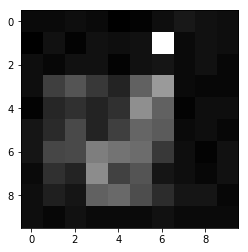

In [17]:
show(base, True)

In [18]:
modified = transform(base, 64, 9, 41)
modified

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 18, 30, 14,  2, 38, 64,  0,  0,  0],
       [ 0,  4, 10,  2, 10, 64, 38,  0,  0,  0],
       [ 0,  6, 24,  2, 18, 40, 34,  0,  0,  0],
       [ 0, 22, 24, 54, 48, 44, 14,  0,  0,  0],
       [ 0, 10,  2, 62, 20, 30,  0,  0,  0,  0],
       [ 0,  0,  0, 38, 42, 26,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

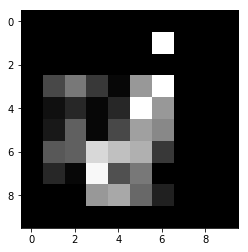

In [13]:
show(modified, True)